# Part I - Ford GoBike Data Exploration 
## by Li Liu

## Introduction
> This data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area.


## Preliminary Wrangling


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import datetime as dt
import calendar

%matplotlib inline

> Load in your dataset and describe its properties through the questions below. Try and motivate your exploration goals through this section.


In [2]:
# load in the dataset into a pandas dataframe, print statistics
df = pd.read_csv('201902_fordgobike_tripdata.csv')

In [3]:
# head view
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [4]:
# Check info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

In [5]:
# Check value_counts for categorical data
print(df.user_type.value_counts())
print(df.bike_share_for_all_trip.value_counts())

Subscriber    163544
Customer       19868
Name: user_type, dtype: int64
No     166053
Yes     17359
Name: bike_share_for_all_trip, dtype: int64


In [6]:
# Check for numerical data
df.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,183412.000000,183215.000000,183412.000000,183412.000000,183215.000000,183412.000000,183412.000000,183412.000000,175147.000000
mean,726.078435,138.590427,37.771223,-122.352664,136.249123,37.771427,-122.352250,4472.906375,1984.806437
std,1794.389780,111.778864,0.099581,0.117097,111.515131,0.099490,0.116673,1664.383394,10.116689
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000
25%,325.000000,47.000000,37.770083,-122.412408,44.000000,37.770407,-122.411726,3777.000000,1980.000000
50%,514.000000,104.000000,37.780760,-122.398285,100.000000,37.781010,-122.398279,4958.000000,1987.000000
75%,796.000000,239.000000,37.797280,-122.286533,235.000000,37.797320,-122.288045,5502.000000,1992.000000
max,85444.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000


#### Data Cleaning

- #1 start and end time are object

- Define: Convert the start and end time to datetime

- Code:

In [7]:
# Data Cleaning: change start and end time to datetime
df.start_time = pd.to_datetime(df.start_time)
df.end_time = pd.to_datetime(df.end_time)

- Test:

In [8]:
# comfirm change
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             183412 non-null  int64         
 1   start_time               183412 non-null  datetime64[ns]
 2   end_time                 183412 non-null  datetime64[ns]
 3   start_station_id         183215 non-null  float64       
 4   start_station_name       183215 non-null  object        
 5   start_station_latitude   183412 non-null  float64       
 6   start_station_longitude  183412 non-null  float64       
 7   end_station_id           183215 non-null  float64       
 8   end_station_name         183215 non-null  object        
 9   end_station_latitude     183412 non-null  float64       
 10  end_station_longitude    183412 non-null  float64       
 11  bike_id                  183412 non-null  int64         
 12  user_type       

- #2 There are some columns with null data

- Define: drop rows contain null data

- Code:

In [9]:
# use dropna drop null data
df.dropna(inplace=True)

- Test:

In [10]:
# check isnull
df.isnull().any().sum()

0

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             174952 non-null  int64         
 1   start_time               174952 non-null  datetime64[ns]
 2   end_time                 174952 non-null  datetime64[ns]
 3   start_station_id         174952 non-null  float64       
 4   start_station_name       174952 non-null  object        
 5   start_station_latitude   174952 non-null  float64       
 6   start_station_longitude  174952 non-null  float64       
 7   end_station_id           174952 non-null  float64       
 8   end_station_name         174952 non-null  object        
 9   end_station_latitude     174952 non-null  float64       
 10  end_station_longitude    174952 non-null  float64       
 11  bike_id                  174952 non-null  int64         
 12  user_type       

### What is the structure of your dataset?

> There are 174952 fordgobike datas in this dataframe, and it's has 16 columns, which are: duration_sec, start_time, end_time, start_station_id, start_station_name, start_station_latitude, start_station_longitude, end_station_id, end_station_name, end_station_longitude, bike_id, user_type, member_birth_year, member_gender, bike_share_for_all_trip. And there are 2 datetime64 , 7 float64 , 2 int64 , 5 object.

### What is/are the main feature(s) of interest in your dataset?

> I'm most interested in those this feature: <br> - When are most trips taken in terms of time of days, weeks and months.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> The dataset contains start time and end time can help me to find the frequece of trips. From duration can help investigation how long the trip take.

## Univariate Exploration

> In this section, I take a deeper look to clean things up and prepare yourself to look at relationships between variables.


- ### Before analyze I break down the "start time" and "end time" to days, weeks and months.

In [12]:
# make colums of start hour, day and month.
df['start_hour'] = pd.DatetimeIndex(df['start_time']).hour
df['start_day'] = pd.DatetimeIndex(df['start_time']).dayofweek
df['start_month'] = pd.DatetimeIndex(df['start_time']).month


# make columns of end hour, day and month.
df['end_hour'] = pd.DatetimeIndex(df['end_time']).hour
df['end_day'] = pd.DatetimeIndex(df['end_time']).dayofweek
df['end_month'] = pd.DatetimeIndex(df['end_time']).month

# Transform month and day number to calendar letter
df['start_day'] = df['start_day'].apply(lambda x: calendar.day_abbr[x])
df['start_month'] = df['start_month'].apply(lambda x: calendar.month_abbr[x])

df['end_day'] = df['end_day'].apply(lambda x: calendar.day_abbr[x])
df['end_month'] = df['end_month'].apply(lambda x: calendar.month_abbr[x])

# check
df.head(5)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,user_type,member_birth_year,member_gender,bike_share_for_all_trip,start_hour,start_day,start_month,end_hour,end_day,end_month
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,...,Customer,1984.0,Male,No,17,Thu,Feb,8,Fri,Mar
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,...,Customer,1972.0,Male,No,12,Thu,Feb,5,Fri,Mar
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,...,Subscriber,1989.0,Other,No,17,Thu,Feb,4,Fri,Mar
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,...,Subscriber,1974.0,Male,Yes,23,Thu,Feb,0,Fri,Mar
5,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,...,Subscriber,1959.0,Male,No,23,Thu,Feb,0,Fri,Mar


In [13]:
# check months value counts
print(df.start_month.value_counts())
print(df.end_month.value_counts())

Feb    174952
Name: start_month, dtype: int64
Feb    174938
Mar        14
Name: end_month, dtype: int64


- ### Most trips taken in terms of time of hours of  a day

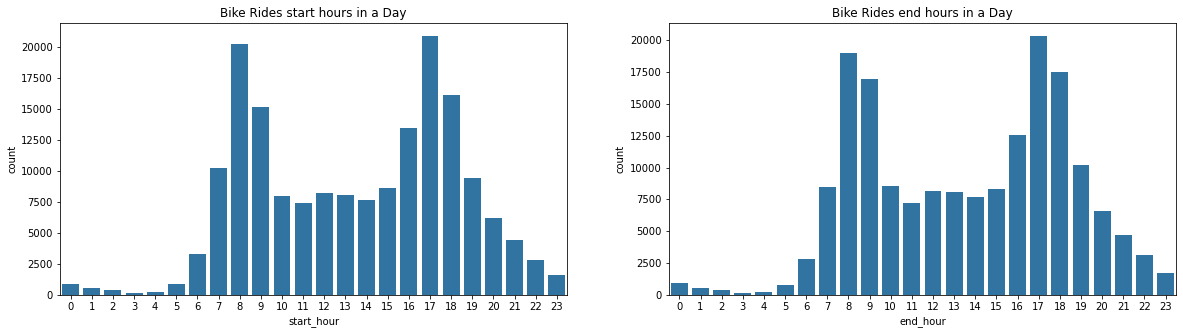

In [14]:
# counts of bike trips start and end in a hours of a day
base_color = sb.color_palette()[0]
plt.figure(figsize = [20,5])

plt.subplot(1,2,1)
sb.countplot(data=df, x='start_hour', color=base_color)
plt.title('Bike Rides start hours in a Day')

plt.subplot(1,2,2)
sb.countplot(data=df, x='end_hour', color=base_color)
plt.title('Bike Rides end hours in a Day');

> From the two histograms above, 8th the 17th hours have most bike trips taked. From 0 to 5th hours are the lowest hours have bike trips.

- ### Most trips taken in terms of time of weeks

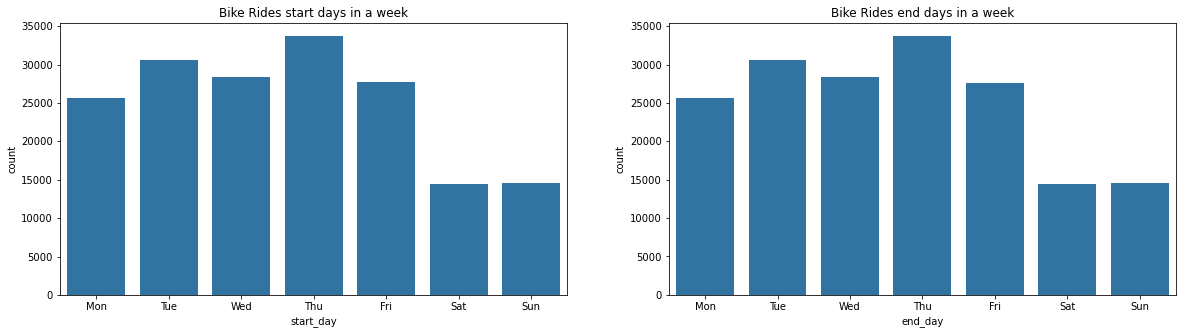

In [15]:
# counts of bike trips start and end in a day
order = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
base_color = sb.color_palette()[0]
plt.figure(figsize = [20,5])

plt.subplot(1,2,1)
sb.countplot(data=df, x='start_day', color=base_color, order = order)
plt.title('Bike Rides start days in a week')

plt.subplot(1,2,2)
sb.countplot(data=df, x='end_day', color=base_color, order = order)
plt.title('Bike Rides end days in a week');

> From the two histograms above, we can find out all the most bike trips were taked on Thursdays. Weekends(Saturday and Sunday) are the least days.

- ### Most trips taken in terms of time of day of the months

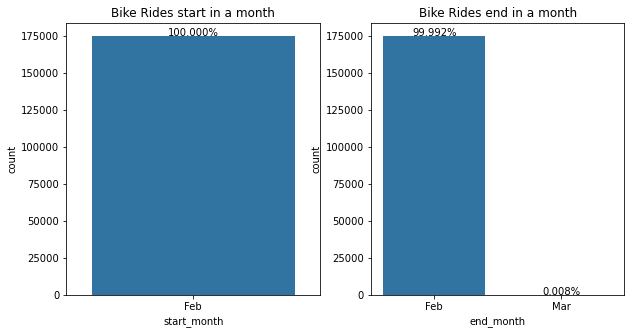

In [16]:
# counts of bike trips start and end in a day
plt.figure(figsize = [10,5])
base_color = sb.color_palette()[0]
start_order = df.start_month.value_counts().index
end_order = df.end_month.value_counts().index

plt.subplot(1,2,1)
ax = sb.countplot(data = df, x = 'start_month', color = base_color, order = start_order)

total = len(df)
for p in ax.patches:
    percentage = '{:.3f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()/2
    y = p.get_height()+.05
    ax.annotate(percentage, (x, y), ha = 'center')
plt.title('Bike Rides start in a month')

plt.subplot(1,2,2)
ax = sb.countplot(data = df, x = 'end_month', color = base_color, order = end_order)

total = len(df)
for p in ax.patches:
    percentage = '{:.3f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()/2
    y = p.get_height()+.05
    ax.annotate(percentage, (x, y), ha = 'center')
plt.title('Bike Rides end in a month');

> The histpgrams above show all of start trips occurred at February, and most of end trips take at February, only very little take from March.

- ### The distribution of trip duration

In [17]:
# function for title labels
def label(x, y, t):
    """
    Args:
    x(str): x-axis title
    y(str): y-axis title
    t(str): main title
    
    Retruns:
    None
    """
    
    plt.xlabel(x)
    plt.ylabel(y)
    plt.title(t)
    plt.show()

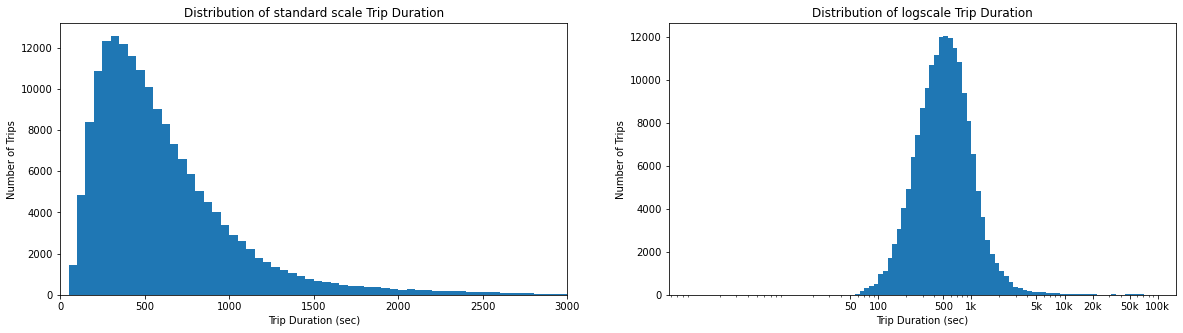

In [18]:
# standard scaled plot of trip duration
plt.figure(figsize=[20, 5])

plt.subplot(1,2,1)
binsize = 50
bins = np.arange(0, df['duration_sec'].max()+binsize, binsize)

plt.hist(data = df, x = 'duration_sec', bins=bins)
plt.title('Distribution of standard scale Trip Duration')
plt.xlabel('Trip Duration (sec)')
plt.ylabel('Number of Trips')
plt.xlim([0, 3000]);


# the log scale of trip duration 
plt.subplot(1,2,2)
bins = 10 ** np.arange(0, np.log10(df['duration_sec'].max())+0.05, 0.05)

plt.hist(data = df, x = 'duration_sec', bins = bins)
plt.xscale('log')
plt.xticks([50, 1e2, 5e2, 1e3, 5e3, 1e4, 2e4, 5e4, 1e5], [50, '100', '500', '1k', '5k', '10k', '20k', '50k', '100k'])
label('Trip Duration (sec)', 'Number of Trips', 'Distribution of logscale Trip Duration');

> From both the standard scaled and log scaled distribution of trip duration plots above, there are a lot of trips take around 500 secs. Most of the values peak are around range of 200 - 2000 secs.

- ### The distribution of the member's age

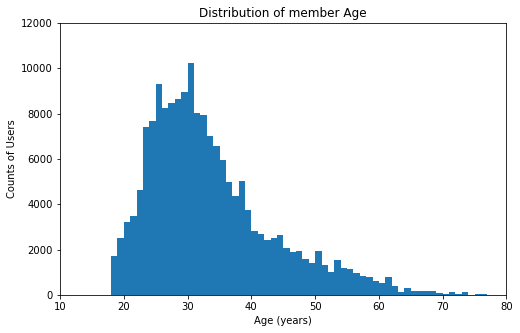

In [29]:
# histPlot of member's age distribution.
binsize = 1
bins = np.arange(0, df['member_birth_year'].astype(float).max()+binsize, binsize)
plt.figure(figsize=[8, 5])

plt.hist(data = df, x = 'member_birth_year', bins = bins)
plt.axis([1939, 2009, 0, 12000])
plt.xticks([1939, 1949, 1959, 1969, 1979, 1989, 1999, 2009], [(2019-1939), (2019-1949), (2019-1959), (2019-1969), (2019-1979), (2019-1989), (2019-1999), (2019-2009)])
plt.gca().invert_xaxis()
label('Age (years)', 'Counts of Users', 'Distribution of member Age');

> The histogram above is  is right-skewed and shows the age between 20yrs to 40yrs have most member. There are very little member after the age of 70yrs.

- ### The distribution of user types

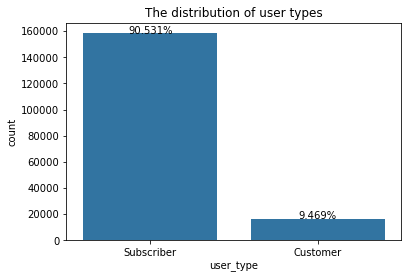

In [20]:
# The distribution of user types
base_color = sb.color_palette()[0]
order = df.user_type.value_counts().index

ax = sb.countplot(data = df, x = 'user_type', color = base_color, order = order)
total = len(df)
for p in ax.patches:
    percentage = '{:.3f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()/2
    y = p.get_height()+.05
    ax.annotate(percentage, (x, y), ha='center')
plt.title('The distribution of user types');

> From the histogram above, we can see most users are subscribers, only less than 10% are non-subscribed users.

- ### The distribution of genders 

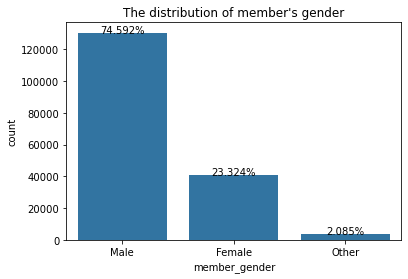

In [21]:
# The distribution of genders
base_color = sb.color_palette()[0]
order = df.member_gender.value_counts().index

ax = sb.countplot(data = df, x = 'member_gender',  color = base_color, order = order)
total = len(df)
for p in ax.patches:
    percentage = '{:.3f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()/2
    y = p.get_height()+.05
    ax.annotate(percentage, (x, y), ha='center')
plt.title('The distribution of member\'s gender');

> From the histogram above, there are nearly 75% of users are males.

- ### The distribution of all trip

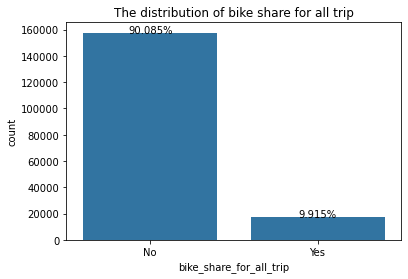

In [22]:
# The distribution for all trip
base_color = sb.color_palette()[0]
order = df.bike_share_for_all_trip.value_counts().index

ax = sb.countplot(data = df, x = 'bike_share_for_all_trip',  color = base_color, order = order)
total = len(df)
for p in ax.patches:
    percentage = '{:.3f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()/2
    y = p.get_height()+.05
    ax.annotate(percentage, (x, y), ha='center')
plt.title('The distribution of bike share for all trip');

> From the histogram above, there are nearly 90% of users are not have all trip.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> The distribution of trip duration shows many large values skew the graph of the data, so I use logarithmic scale to make the visually appealing and easy to understand.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> Before analyze I break down the "start time" and "end time" columns to days, weeks and months columns, to make plotting easier.

## Bivariate Exploration



- ### The relations between duration and start hours, start days.

#####  The plots for duration vers.  hours, days. According to the privious plots ,the values of  start and end hours days have very little difference, so I only plot start_day data to aviod show too many unuseful plots.

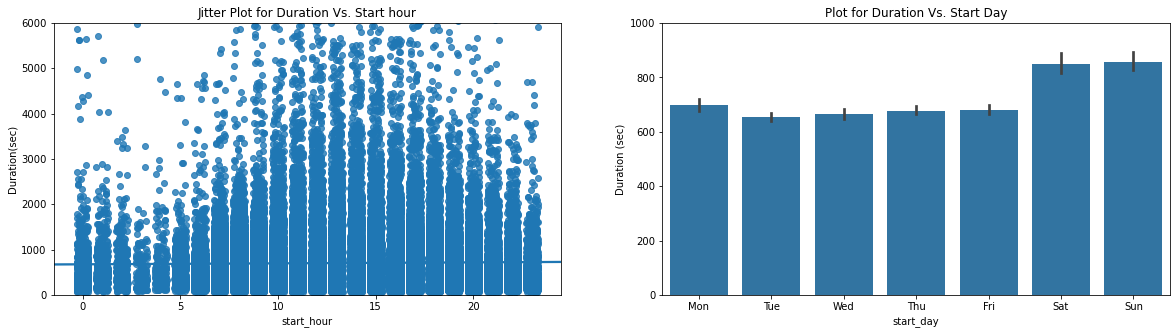

In [33]:
# scatter plot duration for  hours
plt.figure(figsize=[20, 5])
base_color = sb.color_palette()[0]

# Jitter scatter plot for start hour
plt.subplot(1,2,1)
sb.regplot(data = df, x = 'start_hour', y = 'duration_sec', color = base_color, truncate = False , x_jitter = 0.3)
plt.ylim(0,6000)
plt.title('Jitter Plot for Duration Vs. Start hour')
plt.ylabel('Duration(sec)')

# Jitter scatter plot for end hour
plt.subplot(1,2,2)
sb.barplot(data = df, x = 'start_day', y = 'duration_sec', 
            color = base_color, order = order)
plt.ylim(0,1000)
plt.title('Plot for Duration Vs. Start Day')
plt.ylabel('Duration (sec)');

> The scatter plots on left shows the times between 11th to 18th are the most popular time for customer start and end the trips. The hour of 3rd and 4th have the shortest range in all hours. <br>From the bar chart on right, the duration of days looks relatively constant throughout the week, Sat and Sun have slightly increased data.

I use pointplot for more obvious view of the Duration Vs. start days.

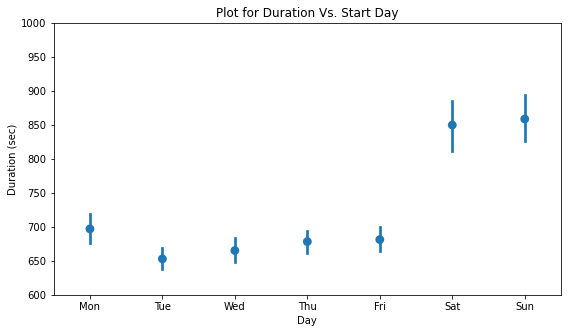

In [34]:
#pointplot for Duration Vs. days
order = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
plt.figure(figsize=[20, 5])

#plot days
plt.subplot(1,2,1)
sb.pointplot(data = df, x = 'start_day', y = 'duration_sec', color = base_color, linestyles = "", order = order)
plt.ylim(600,1000)
label('Day', 'Duration (sec)','Plot for Duration Vs. Start Day');

> The pointplot above give more significent views tells that Sat and Sun have increased durations.

- ### The relations of user type vs. start hour, start day

The plots below shows how the bike user's type affects by hours and days.

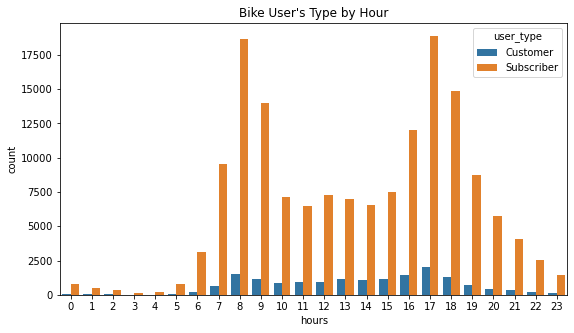

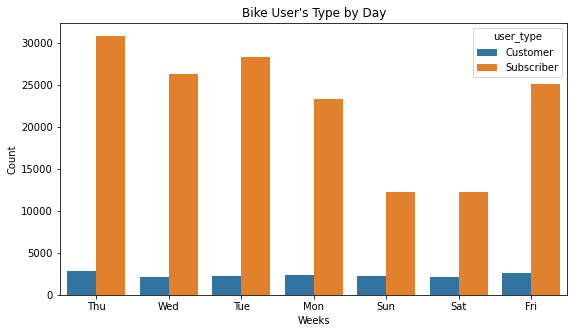

In [43]:
plt.figure(figsize = (20, 5))

# Bike User's Type by Hour
plt.subplot(1,2,1)
sb.countplot(data = df, x = 'start_hour', hue = 'user_type')
label('hours', 'count', 'Bike User\'s Type by Hour')


# Bike User's Type by Day
plt.figure(figsize = (20, 5))
plt.subplot(1,2,2)
sb.countplot(data = df, x = 'start_day', hue = 'user_type')
label('Weeks', 'Count', 'Bike User\'s Type by Day');

> From the histograms above we can see most of subscriber and customer user use bike at 8th and 17th. There are not much change for customer by days.For subscriber for the days Thu has the highest peek, Sun and Sat have lowest data.

- ### The relations of user type vs. member_gender

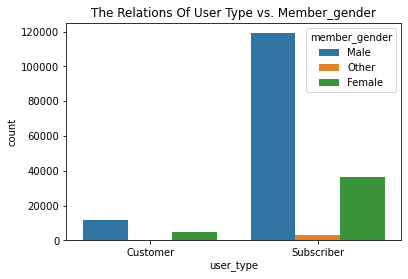

In [26]:
# countplot for the relations of user type vs. member_gender
sb.countplot(data = df, x = 'user_type', hue = 'member_gender')
plt.title('The Relations Of User Type vs. Member_gender');

> From the bar chart above, I found out the male subscriber have largest dataset, the customer with gender of other have lowest dataset.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> From "The relations between duration and start hours, start days" plots I found out that Sat and Sun have largest duration time, but "The relations of user type vs. start hour, start day" plots shows the count of Sat and Sun have the lowest data. That indicate Sat and Sun have less amount of usages but longest duration.


### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> I also observe that male subscriber have most amount of usages.

## Multivariate Exploration

> I want to explore in this part is the relationship bewteen member gender and bike share for all trip by weeks.

- ### All Trip Duration Across Weeks And Member Genders

<Figure size 576x576 with 0 Axes>

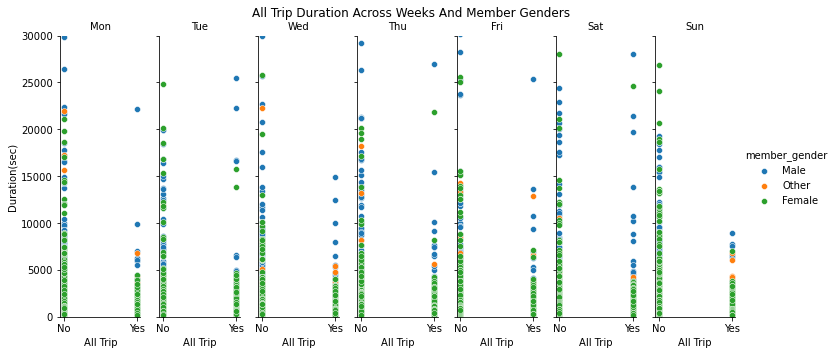

In [27]:
# plot of All Trip Duration Across Weeks And Member Genders
plt.figure(figsize = (8,8))
order = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

g = sb.FacetGrid(df, col="start_day", hue="member_gender", height=5, aspect=0.3, col_order = order)
g.map_dataframe(sb.scatterplot, x="bike_share_for_all_trip", y="duration_sec")
plt.ylim(0,30000)
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle('All Trip Duration Across Weeks And Member Genders')
g.set_titles("{col_name}")
g.set_axis_labels("All Trip", "Duration(sec)", fontsize=10)
g.add_legend();


> From the scatter plots set above, I found out that female user who NOT make all trip most likely use bike under 15000secs for  whole week long. And male user whom not make all trip most likely use bike above 15000secs for whole week long. All member gender users took all trip's duration most under 10000secs. The member of famale took shorter all trip than male and other.

- ### Duration across days and user type

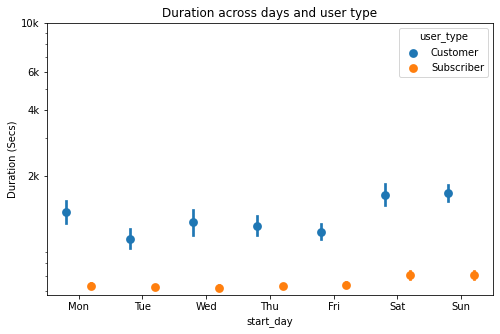

In [37]:
#plot of Duration across days and user type
order = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
fig = plt.figure(figsize = [8,5])

ax = sb.pointplot(data = df, x ='start_day', y = 'duration_sec', hue = 'user_type', linestyles = '', dodge = 0.4, order = order)
plt.title('Duration across days and user type')
plt.ylabel('Duration (Secs)')
plt.yscale('log')
plt.yticks([2e3, 4e3, 6e3, 1e4], ['2k', '4k', '6k', '10k'])
ax.set_yticklabels([],minor = True);


> From the pointplot above it shows the customer user have longer duration than subscriber for whole week long. Both customer and subscriber have longest duration at Sun.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> From the scatter plots set above, I found out that female user who NOT make all trip most likely use bike under 15000secs for whole week long. And male user whom not make all trip most likely use bike above 15000secs for whole week long. All member gender users took all trip's duration most under 10000secs. The member of famale took shorter all trip than male and other.
### Were there any interesting or surprising interactions between features?

> From the pointplot above it shows the customer user have longer duration than subscriber for whole week long. Both customer and subscriber have longest duration at Sun.

## Conclusions
> 1. The 8th and the 17th hours have most bike trips taked. The most bike trips were taked on Thursdays. 
2. There are a lot of trips take around 500 secs. Most of the values peak are around range of 200 - 2000 secs.
3. The member age are mostly between 20yrs to 40yrs. 
4. Most users are subscribers, only less than 10% are non-subscribed users. there are nearly 75% of users are males. there are nearly 90% of users are not have all trip.
5. The times between 11th to 18th are the most popular time for customer start and end the trips. The hour of 3rd and 4th have the shortest range in all hours. The duration of days looks relatively constant throughout the week, Sat and Sun have slightly increased data.
6. Most of subscriber and customer user use bike at 8th and 17th. There are not much change for customer by days.For subscriber for the days Thu has the highest peek, Sun and Sat have lowest data.
7. The male subscriber have largest dataset, the customer with gender of other have lowest dataset.
8. Female user who NOT make all trip most likely use bike under 15000secs for whole week long. And male user whom not make all trip most likely use bike above 15000secs for whole week long. All member gender users took all trip's duration most under 10000secs. The member of famale took shorter all trip than male and other.
9. The customer user have longer duration than subscriber for whole week long. Both customer and subscriber have longest duration at Sun.